In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from wfdb import processing
from scipy import signal

In [2]:
data = pd.read_csv("X_train.csv")
answers = pd.read_csv("y_train.csv")

In [3]:
data = (pd.merge(data ,answers, on = "Unnamed: 0"))

In [4]:
data = data.drop( ["Unnamed: 0"], axis = 1)

In [5]:
data.head()

,age,gender,i_0,i_1,i_2,i_3,i_4,i_5,i_6,i_7,...,v6_4991,v6_4992,v6_4993,v6_4994,v6_4995,v6_4996,v6_4997,v6_4998,v6_4999,axis_id
0,60,1,-59.0,-58.0,-58.0,-58.0,-58.0,-58.0,-58.0,-58.0,...,114.0,119.0,124.0,129.0,134.0,147.0,172.0,200.0,143.0,3
1,82,0,-39.0,-38.0,-38.0,-38.0,-38.0,-38.0,-38.0,-38.0,...,229.0,259.0,289.0,319.0,349.0,379.0,409.0,439.0,302.0,3
2,59,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-58.0,-58.0,-58.0,-58.0,-58.0,-58.0,-38.0,-11.0,-2.0,2
3,81,0,108.0,106.0,93.0,79.0,86.0,74.0,64.0,51.0,...,81.0,89.0,79.0,59.0,61.0,64.0,49.0,26.0,10.0,3
4,30,1,363.0,366.0,366.0,353.0,334.0,314.0,306.0,294.0,...,-61.0,-59.0,-86.0,-66.0,-71.0,-91.0,-84.0,-11.0,-4.0,0


In [6]:
import seaborn as sns

In [7]:
data.age[data.age > 100] = data.age[data.age > 100] - 100

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
data.age[data.age > 100]

Series([], Name: age, dtype: int64)

In [19]:
len(data)

659

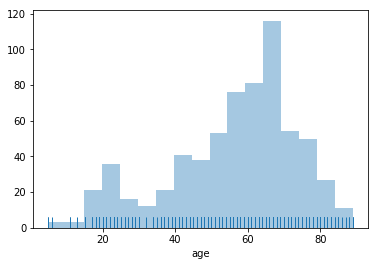

In [28]:
g = sns.distplot(data.age, kde=False, rug=True);

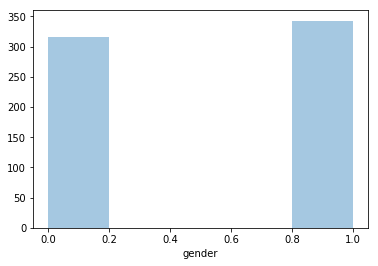

In [18]:
sns.distplot(data.gender, kde=False, rug=False);

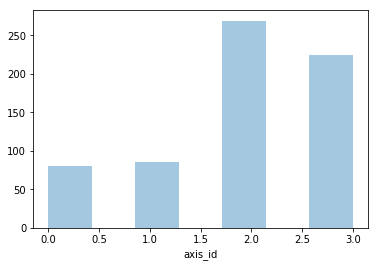

In [17]:
sns.distplot(data.axis_id, kde=False, rug=False);

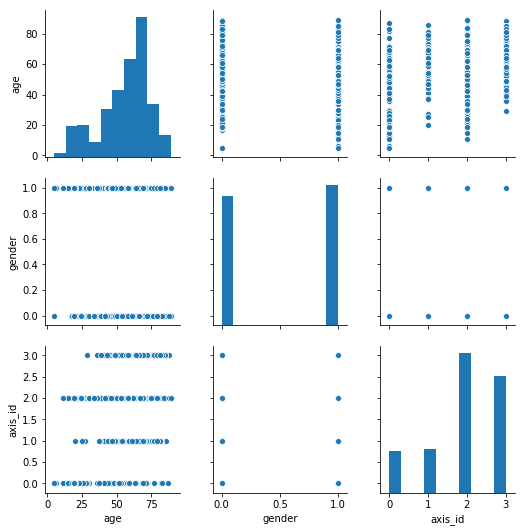

In [20]:
sns.pairplot(data[['age','gender', 'axis_id']])

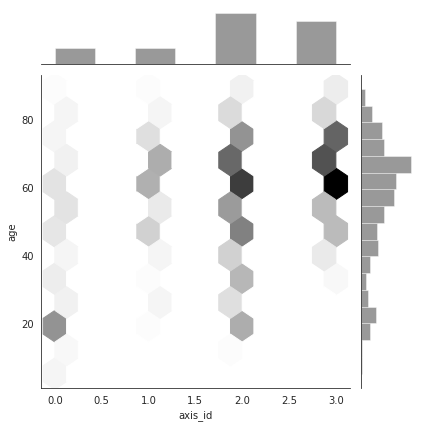

In [36]:
with sns.axes_style("white"):
    sns.jointplot(x=data.axis_id, y=data.age, kind="hex", color="k");

In [ ]:

data['age'] = (data['age'] - data['age'].mean(axis = 0))/data['age'].std(axis = 0)

In [ ]:
data.head()

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [ ]:
data_as_matrix = data.values

In [ ]:
data_as_matrix.shape

In [ ]:
data

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
signal_data = []
for ind, line in enumerate (data_as_matrix, 0):
    r_peaks = []
    for i in range(2, 55003, 5000):
        signal = line[i : i+5000]
        xqrs = processing.XQRS(sig=signal, fs=500)
        xqrs.detect(verbose = False)
        r_peaks.append(xqrs.qrs_inds)
    signal_data.append(r_peaks)
    if (ind % 20 == 0):
        print(str(ind)+"/659")

In [ ]:
signal_data[0]

In [ ]:
signal_df = pd.DataFrame(data = signal_data,
                   columns=["i", "ii", "iii", "avr", "avl", "avf", "v1", "v2", "v3", "v4", "v5", "v6" ])

In [ ]:
additional_info = pd.DataFrame()

In [ ]:
additional_info["length"]  = signal_df.apply(lambda row: [len(x) for x in row], axis = 1)

In [ ]:
additional_info["l_mean"] =  additional_info["length"].apply(lambda x: np.mean(x))

In [ ]:
additional_info["l_std"] =  additional_info["length"].apply(lambda x: np.std(x))

In [ ]:
additional_info["first_std"]  = signal_df.apply(lambda row: np.std([x[0] for x in row]), axis = 1)

In [ ]:
additional_info["last_std"]  = signal_df.apply(lambda row: np.std([x[len(x) - 1] for x in row]), axis = 1)

In [ ]:
additional_info = additional_info.drop(["length"], axis=1)

In [ ]:
additional_info.head()

In [ ]:
signal_df.values[0]

In [ ]:
additional_info.describe()

In [ ]:
signals = [data.values[0,x:x+5000] for x in range(2, 55003, 5000)]

In [ ]:
for i in range(12):
    plt.plot(signals[i])
    plt.plot(signal_data[0][i], signals[i][signal_data[0][i]], 'ro')
    plt.show()

In [ ]:
signal_df.to_csv("signal_data.csv", sep="#",  index=False)

In [ ]:
signal_df = pd.read_csv("signal_data.csv", sep="#", index_col=False)

In [ ]:
np.fromstring(signal_df.iloc[0]["iii"][1:-1], sep="  ", dtype=np.uint64)

In [ ]:
for column in signal_df.columns:
    signal_df[column] = signal_df[column].apply(lambda row: np.fromstring(row[1:-1], sep="  ", dtype=np.uint64))

In [ ]:
signal_df.head()

In [8]:
def bandpass(data, fs, fc_low=5, fc_high=20):
        """
        Apply a bandpass filter onto the signal, and save the filtered
        signal.
        """
    

        b, a = signal.butter(2, [float(fc_low) * 2 / fs,
                                 float(fc_high) * 2 / fs], 'pass')
        return signal.filtfilt(b, a, data,
                                     axis=0)

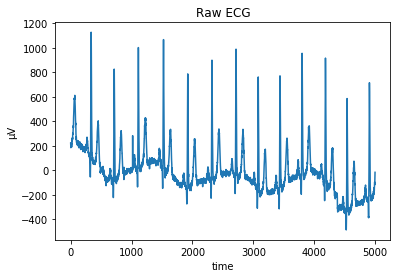

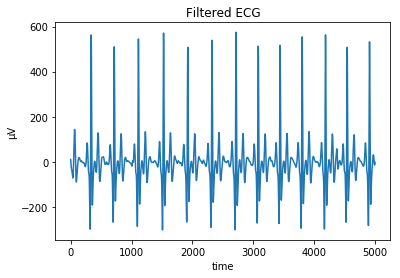

In [21]:
signal60 = data.values[60][2:5002]
plt.plot(signal60, 'g')
plt.show()
plt.plot(bandpass(signal60, 500, 5, 250 ))

In [ ]:
from torch.utils.data import Dataset, DataLoader

In [ ]:
class FilteredDataset(Dataset):
    def __init__(self, data, low_cut = 5, high_cut = 20):
        
        self.data = data.values
        self.no_classes = 4
        self.low_cut = low_cut
        self.high_cut = high_cut
        self._filter_signal()
        
    def _apply_bandpass(self, row):
        return [bandpass(row[i : i + 5000], 500, self.low_cut, self.high_cut) for i in range(2, 55003, 5000)]
        
    def _filter_signal(self):
        self.filtered_data = np.apply_along_axis(lambda x: self._apply_bandpass(x),1, self.data)

    def __len__(self):
        """
        Denotes the total number of samples.
        """
        return len(self.filtered_data)
    
    def _get_label(self, idx):
        label = np.zeros((self.no_classes), dtype=np.float32)
        label[int(self.data[idx][-1])] = 1
        return label

    def __getitem__(self, idx):
        """
        Generates one sample of data.
        """
        
        return self.filtered_data[idx], self._get_label(idx)

In [ ]:
dataset = FilteredDataset(data)

In [ ]:
train_loader = DataLoader(
    dataset, batch_size=32
)

In [ ]:
for i in train_loader:
    print(i[0].shape)
    plt.plot(i[0][0].numpy()[-1])
    break

In [ ]:
class FixedLengthDataset(FilteredDataset):
    def __init__(self, data, peaks, signal_length, min_start_offset = 50, max_start_offset = 300, low_cut = 5, high_cut = 20):
        super().__init__(data, low_cut, high_cut)
        self.peaks = peaks.values
        self.signal_length = signal_length
        self.min_start_offset = min_start_offset
        self.max_start_offset = max_start_offset
        self._get_cuts()
        
    def _get_peaks_for_signal_cuts(self, peaks):
        try:
            filtered_peaks = [
                peak for peak in peaks 
                if peak < 5000 - self.signal_length or 5000 - self.signal_length > max(0, peak - self.max_start_offset) 
                             ]
            return filtered_peaks
        except:
            print("Exception: ", peaks)
            return []

    def _get_cuts(self):
        cut_points = []
        for i, peaks in enumerate(self.peaks):
            filtered_peaks =  self._get_peaks_for_signal_cuts(peaks[0]) # only for first (i) led
            for point in filtered_peaks:
                cut_points.append([i, point])
        self.cut_points = cut_points
        
    def _cut(self, rows, cut_point):
        start_offset =  cut_point - np.random.randint(self.min_start_offset, self.max_start_offset+1)
        start_offset = min(start_offset, 5000 - self.signal_length)
        start_offset = int(max(0, start_offset))
        end_offset = start_offset + self.signal_length
        try:
            cut_rows = [row[start_offset:end_offset] for row in rows]
            print(cut_point, start_offset, end_offset)
            return np.array(cut_rows)
        except:
            print ("Cut Exception:")
            print(rows)
            print(cut_point, start_offset, end_offset)
        
    def __len__(self):
        """
        Denotes the total number of samples.
        """
        return len(self.cut_points)

    def __getitem__(self, idx):
        """
        Generates one sample of data.
        """
        true_idx, cut_point = self.cut_points[idx]
        label = self._get_label(true_idx)
        cut_rows = self._cut(self.filtered_data[true_idx], cut_point)
        
        return cut_rows, label

In [ ]:
fldataset = FixedLengthDataset(data, signal_df, 3000)

In [ ]:
fl_loader = DataLoader(
    fldataset, batch_size=1
)

In [ ]:
for i in fl_loader:
    print(i[0].shape)